In [1]:
# 导入需要的工具包
import pandas as pd # data processing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  # plot
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('D:/document/firefoxdownload/cardio_train.csv',sep=';')

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.drop(columns=['id'],inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
pandas_profiling.ProfileReport(data)

<AxesSubplot:xlabel='cardio', ylabel='age'>

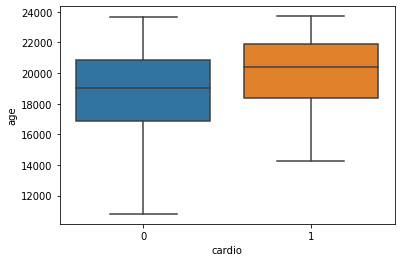

In [8]:
# distribution wrt age
sns.boxplot(x='cardio',y='age',data=data)

<AxesSubplot:xlabel='cardio', ylabel='weight'>

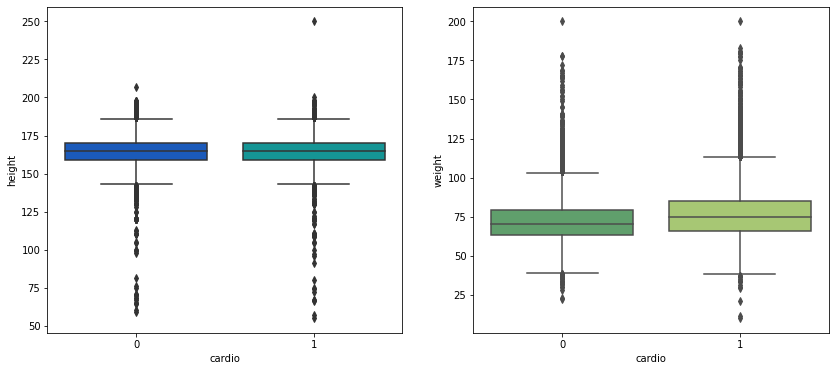

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=data,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=data,palette='summer')

In [10]:
# correlations with target class
correlations = data.corr()['cardio'].drop('cardio')
print(correlations)

age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
Name: cardio, dtype: float64


In [11]:
def feat_select(threshold):
    abs_cor = correlations.abs()
    features = abs_cor[abs_cor > threshold].index.tolist()
    return features

In [12]:
def model(mod,X_tr,X_te):
    mod.fit(X_tr,y_train)
    pred = mod.predict(X_te)
    print('Model score = ',mod.score(X_te,y_test)*100,'%')


In [13]:
# 切分数据集
msk = np.random.rand(len(data))<0.85
df_train_test = data[msk]
df_val = data[~msk]

X = df_train_test.drop('cardio',axis=1)
y = df_train_test['cardio']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [14]:
# 逻辑回归
lr = LogisticRegression()

In [15]:
threshold = [0.001,0.002,0.005,0.01,0.05,0.1]
for i in threshold:
    print("Threshold is {}".format(i))
    feature_i = feat_select(i)
    X_train_i = X_train[feature_i]
    X_test_i = X_test[feature_i]
    model(lr,X_train_i,X_test_i)

Threshold is 0.001
Model score =  69.44748128836935 %
Threshold is 0.002
Model score =  69.44748128836935 %
Threshold is 0.005
Model score =  69.44748128836935 %
Threshold is 0.01
Model score =  69.44748128836935 %
Threshold is 0.05
Model score =  55.12572533849129 %
Threshold is 0.1
Model score =  58.3634681692036 %


In [16]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_train_ = pd.DataFrame(X_train_scaled,columns=data.columns[:-1])

In [17]:
scale.fit(X_test)
X_test_scaled = scale.transform(X_test)
X_test_ = pd.DataFrame(X_test_scaled,columns=data.columns[:-1])

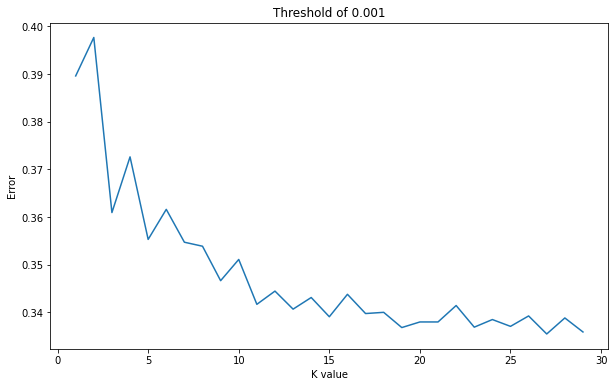

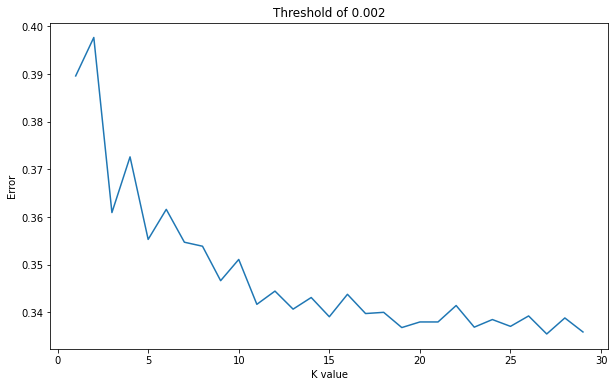

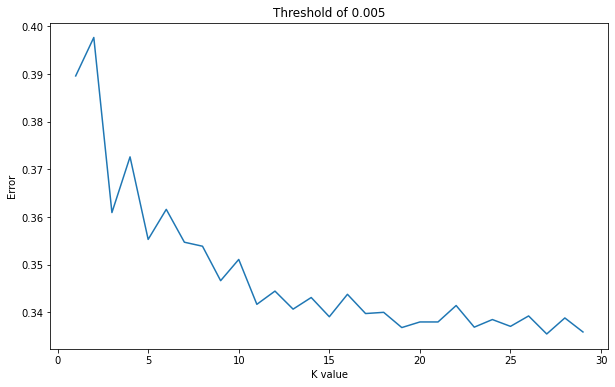

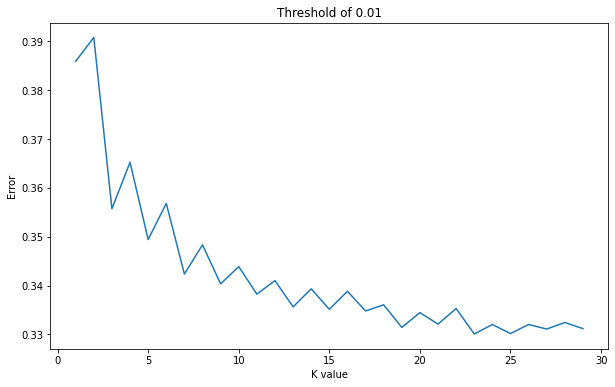

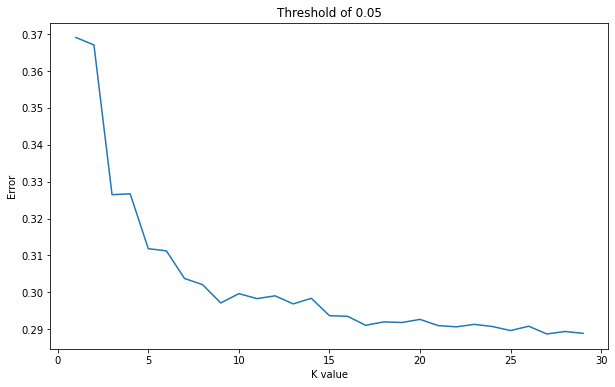

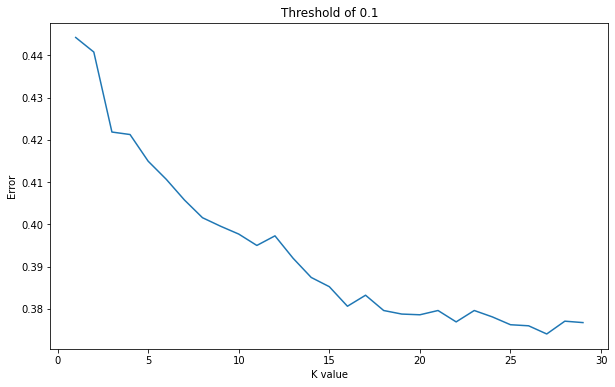

In [18]:
# optimum k with optimum threshold
for i in threshold:
    feature = feat_select(i)
    X_train_k = X_train_[feature]
    X_test_k = X_test_[feature]
    err = []
    for j in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(X_train_k,y_train)
        pred_j = knn.predict(X_test_k)
        err.append(np.mean(y_test != pred_j))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,30),err)
    plt.title('Threshold of {}'.format(i))
    plt.xlabel('K value')
    plt.ylabel('Error')

In [19]:
feat_final = feat_select(0.05)
print(feat_final)

['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']


In [20]:
X_train = X_train_[feat_final]
X_val = np.asanyarray(df_val[feat_final])
y_val = np.asanyarray(df_val['cardio'])

scale.fit(X_val)
X_val_scaled = scale.transform(X_val)
X_val_ = pd.DataFrame(X_val_scaled,columns=df_val[feat_final].columns)

In [21]:
# knn with k=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_val_)

In [22]:
print('Confusion Matrix =\n',confusion_matrix(y_val,pred))
print('\n',classification_report(y_val,pred))

Confusion Matrix =
 [[3834 1466]
 [1512 3737]]

               precision    recall  f1-score   support

           0       0.72      0.72      0.72      5300
           1       0.72      0.71      0.72      5249

    accuracy                           0.72     10549
   macro avg       0.72      0.72      0.72     10549
weighted avg       0.72      0.72      0.72     10549



In [23]:
# Logistic regression
lr.fit(X_train,y_train)
pred = lr.predict(X_val_)

In [24]:
# reports
print('Confusion Matrix =\n',confusion_matrix(y_val,pred))
print('\n',classification_report(y_val,pred))

Confusion Matrix =
 [[4285 1015]
 [1998 3251]]

               precision    recall  f1-score   support

           0       0.68      0.81      0.74      5300
           1       0.76      0.62      0.68      5249

    accuracy                           0.71     10549
   macro avg       0.72      0.71      0.71     10549
weighted avg       0.72      0.71      0.71     10549

